Value of cost function with initial parameters:  6909.875
Value of cost function with parameters from gradient descent:  191.6671889168266
Value of cost function with parameters from normal equasion:  146.14923134091126
Parametres theta from gradient descent [0.95084396 0.3446947  0.34098413]
Parametres theta from normal equasion [19.67366578  0.34672525 -0.27109198]
Input 2 values divided by space: 1 2 
Predicted value:  19.478207065487627


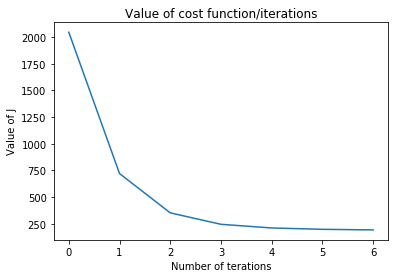

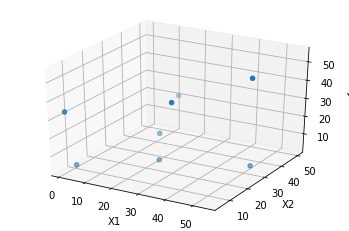

In [297]:
import numpy as np
import numpy.linalg
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


#initial parameters of x, hypothesis and theta
X = np.array([[1,1,5],[1,3,7],[1,34,14],[1,12,50],[1,54,27],[1,23,23],[1,17,32],[1,53,29]]) 
Y = np.array([34,4,43,21,54,3,11,5])
theta = np.array([1,2,3])

#choose for every data set
eps = 0.002
alpha = 0.001

#check on mean square(standart deviation)
def J(t):
    return 1/(2 * len(Y)) * sum((np.dot(t, X[i]) - Y[i])**2 for i in range(len(Y)))

#gradient descent
def gradient(X, Y, theta0, a, eps):
    delta, sigma = 10, 0
    CF = [] 
    while delta > eps:
        sigma = 1/len(Y)*sum((np.dot(theta0, X[i]) - Y[i]) * X[i] for i in range(len(Y)))
        temp = theta0[0]
        theta0 = theta0 - a * sigma
        delta = abs(theta0[0] - temp)
        CF.append(J(theta0))
    plt.plot(CF)
    plt.title('Value of cost function/iterations')
    plt.xlabel('Number of terations')
    plt.ylabel('Value of J')
    return theta0

#normal equasion
def normal_eq(X, Y): return numpy.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(Y)
    
#Output
print('Value of cost function with initial parameters: ', J(theta))
grad = gradient(X, Y, theta, alpha, eps)
norm = normal_eq(X, Y)
print('Value of cost function with parameters from gradient descent: ', J(grad))
print('Value of cost function with parameters from normal equasion: ', J(norm))

print('Parametres theta from gradient descent', grad)
print('Parametres theta from normal equasion', norm)

def prediction(theta):
    X = np.array([1] + list(map(int, input(f'Input {len(theta) - 1} values divided by space: ').split())))
    return theta.transpose().dot(X)

#'''if h(theta) = theta0 + theta1*x'''

#plt.plot(X[:,1],Y, 'o')
#y = np.linspace(0,50,50)
#z = lambda x: grad[0] + grad[1]*x
#z = list(map(z,y))
#plt.title('linear regression')
#plt.plot(y,z)
#plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,1], X[:,2], Y,cmap='viridis')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
print('Predicted value: ', prediction(norm))
